<a href="https://colab.research.google.com/github/Shahryar-Anwer/Image-detector/blob/main/Computer_Vision_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1: Adding noise to an image:**

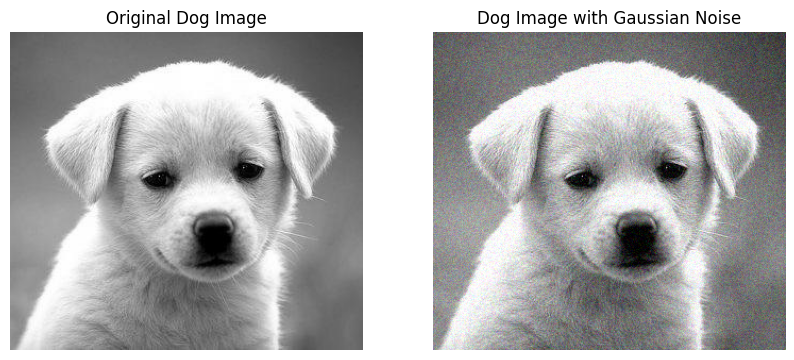

True

In [10]:
import cv2  # For image loading/saving
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread("/content/dog.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB for correct display

# Step 2: Generate Gaussian noise (mean=0, std=15)
mean = 0
std = 15
noise = np.random.normal(mean, std, image.shape)

# Step 3: Add noise to the image
noisy_image = image + noise

# Step 4: Clip values to [0,255] and convert to uint8
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Step 5: Display original and noisy images
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original Dog Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Dog Image with Gaussian Noise")
plt.imshow(noisy_image)
plt.axis("off")

plt.show()

# Step 6: Save noisy image
cv2.imwrite("dog_noisy.jpg", cv2.cvtColor(noisy_image, cv2.COLOR_RGB2BGR))


**Q2:**

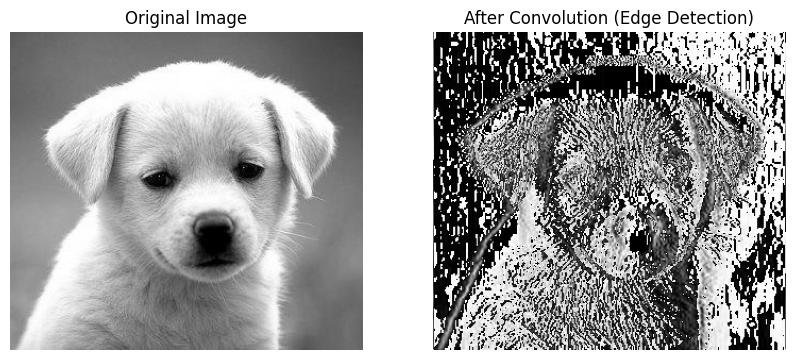

True

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image. Convolution filtering will highlight the vertical edges in the picture.
image = cv2.imread("/content/dog.jpg", cv2.IMREAD_GRAYSCALE)

# Step 2: We are using a Sobel filter to detect vertical edges.
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Step 3: Flip the kernel both horizontally & vertically
kernel_flipped = np.flipud(np.fliplr(kernel))

# Step 4: Apply zero padding
pad_height = kernel.shape[0] // 2
pad_width = kernel.shape[1] // 2
padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

# Step 5: Initialize output image
output = np.zeros_like(image)

# Step 6: Perform convolution
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # Extract region of interest
        region = padded_image[i:i+kernel.shape[0], j:j+kernel.shape[1]]
        # Weighted sum
        output[i, j] = np.sum(region * kernel_flipped)

# Step 7: Normalize result to range [0,255]
output = np.clip(output, 0, 255).astype(np.uint8)

# Step 8: Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("After Convolution (Edge Detection)")
plt.imshow(output, cmap='gray')
plt.axis("off")
plt.show()

# Save result
cv2.imwrite("dog_convolved.jpg", output)


**Q3: Part 1**

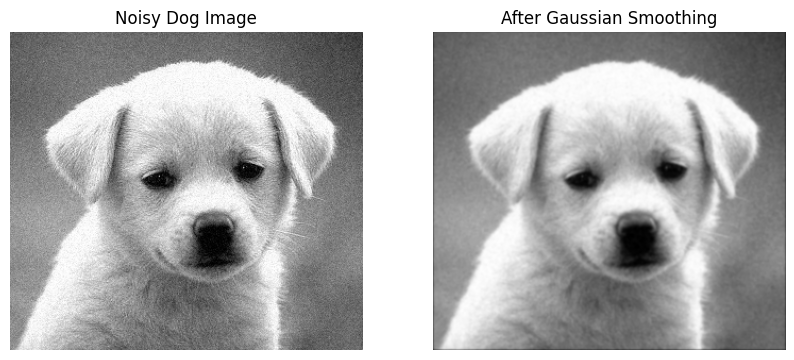

True

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- Function: Convolution ----------
def convolve(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant")
    output = np.zeros_like(image, dtype=float)

    # Flip kernel for convolution
    kernel_flipped = np.flipud(np.fliplr(kernel))

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel_flipped)

    return np.clip(output, 0, 255).astype(np.uint8)

# ---------- Step 1: Load noisy dog image ----------
noisy_image = cv2.imread("/content/dog_noisy.jpg", cv2.IMREAD_GRAYSCALE)

# ---------- Step 2: Create 7x7 Gaussian kernel (σ = 1.0) ----------
def gaussian_kernel(size, sigma=1.0):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

gaussian_7x7 = gaussian_kernel(7, sigma=1.0)

# ---------- Step 3: Apply Gaussian filter ----------
smoothed_image = convolve(noisy_image, gaussian_7x7)

# ---------- Step 4: Show results ----------
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Noisy Dog Image")
plt.imshow(noisy_image, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("After Gaussian Smoothing")
plt.imshow(smoothed_image, cmap="gray")
plt.axis("off")
plt.show()

# ---------- Step 5: Save ----------
cv2.imwrite("dog_smoothed.jpg", smoothed_image)


**Q3: Part 2**

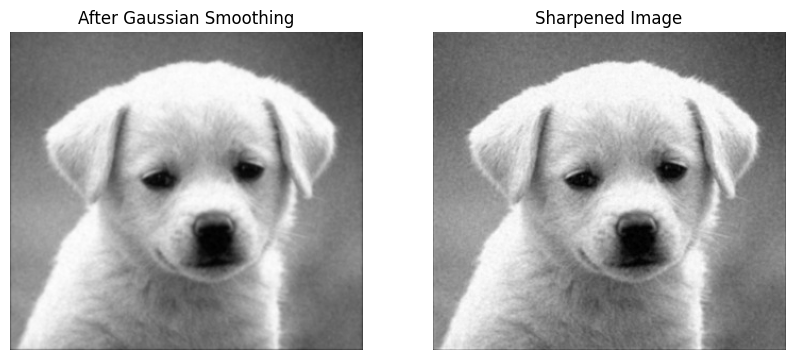

True

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- Function: Convolution ----------
def convolve(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant")
    output = np.zeros_like(image, dtype=float)

    kernel_flipped = np.flipud(np.fliplr(kernel))

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel_flipped)

    return np.clip(output, 0, 255).astype(np.uint8)

# ---------- Step 1: Load smoothed image ----------
smoothed_image = cv2.imread("/content/dog_smoothed.jpg", cv2.IMREAD_GRAYSCALE)

# ---------- Step 2: Define sharpening kernel ----------
sharpening_kernel = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1],
]) * -1.0 / 256.0

# ---------- Step 3: Apply sharpening ----------
sharpened_image = convolve(smoothed_image, sharpening_kernel)

# ---------- Step 4: Show results ----------
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("After Gaussian Smoothing")
plt.imshow(smoothed_image, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap="gray")
plt.axis("off")
plt.show()

# ---------- Step 5: Save ----------
cv2.imwrite("dog_sharpened.jpg", sharpened_image)


**Q4**

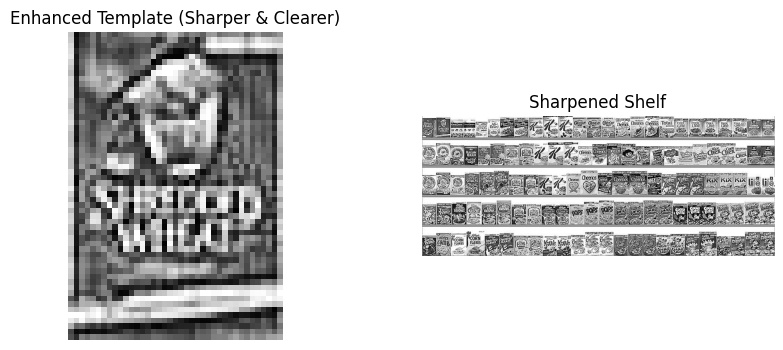

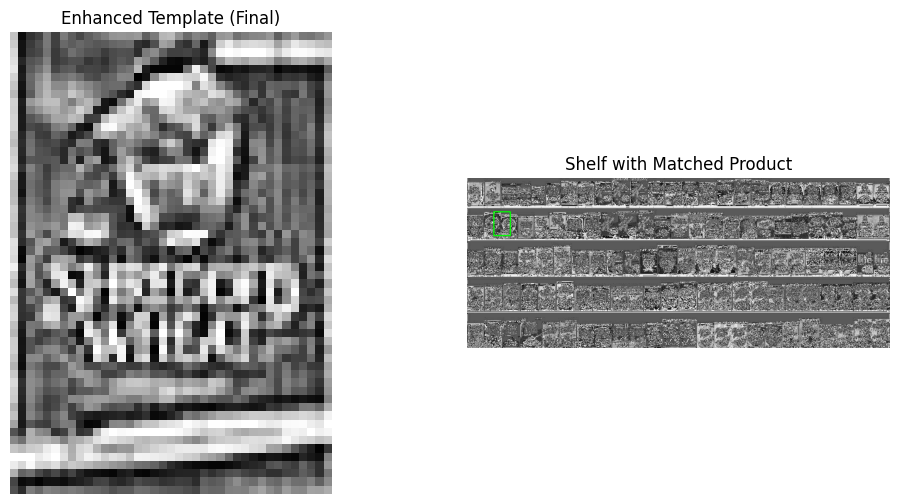

True

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- Convolution Function ----------
def convolve(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant")
    output = np.zeros_like(image, dtype=float)

    kernel_flipped = np.flipud(np.fliplr(kernel))

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel_flipped)

    return output

# ---------- Step 1: Load Images ----------
shelf = cv2.imread("/content/shelf.jpg", cv2.IMREAD_GRAYSCALE)
template = cv2.imread("/content/template.jpg", cv2.IMREAD_GRAYSCALE)

# ---------- Step 2: Strong Sharpening for Template ----------
# Apply Gaussian blur
template_blur = cv2.GaussianBlur(template, (5,5), 1.0)

# Unsharp mask (make edges stronger)
template = cv2.addWeighted(template, 2.0, template_blur, -1.0, 0)

# Contrast enhancement with CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
template = clahe.apply(template)

# ---------- Step 3: Mild Sharpening for Shelf ----------
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
shelf = cv2.filter2D(shelf, -1, sharpen_kernel)

# ---------- Step 4: Show Enhanced Template & Shelf ----------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Enhanced Template (Sharper & Clearer)")
plt.imshow(template, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Sharpened Shelf")
plt.imshow(shelf, cmap='gray')
plt.axis('off')
plt.show()

# ---------- Step 5: Normalize (subtract mean) ----------
shelf = shelf.astype(float) - np.mean(shelf)
template = template.astype(float) - np.mean(template)

# ---------- Step 6: Convolve shelf with template ----------
conv_result = convolve(shelf, template)

# ---------- Step 7: Find best match ----------
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(conv_result)
top_left = max_loc
h, w = template.shape
bottom_right = (top_left[0] + w, top_left[1] + h)

# ---------- Step 8: Draw rectangle ----------
shelf_color = cv2.cvtColor(shelf.astype(np.uint8), cv2.COLOR_GRAY2BGR)
cv2.rectangle(shelf_color, top_left, bottom_right, (0,255,0), 2)

# ---------- Step 9: Show Results ----------
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Enhanced Template (Final)")
plt.imshow(template, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Shelf with Matched Product")
plt.imshow(shelf_color)
plt.axis("off")
plt.show()

# ---------- Step 10: Save ----------
cv2.imwrite("shelf_detected.jpg", shelf_color)


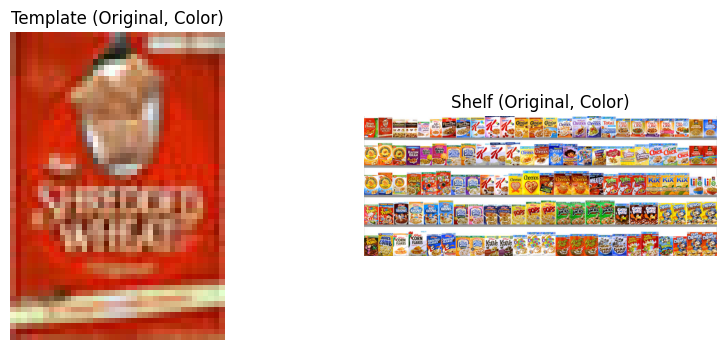

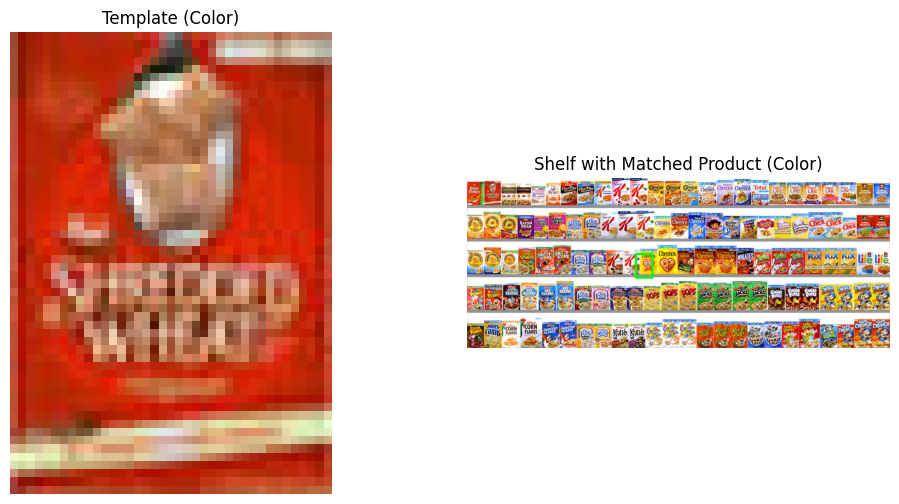

True

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- Convolution Function ----------
def convolve(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant")
    output = np.zeros_like(image, dtype=float)

    kernel_flipped = np.flipud(np.fliplr(kernel))

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel_flipped)

    return output

# ---------- Step 1: Load Images in COLOR ----------
shelf = cv2.imread("/content/shelf.jpg")      # BGR color
template = cv2.imread("/content/template.jpg")  # BGR color

# ---------- Step 2: Show Template & Shelf ----------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Template (Original, Color)")
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Shelf (Original, Color)")
plt.imshow(cv2.cvtColor(shelf, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# ---------- Step 3: Convolve per channel ----------
conv_results = []
for c in range(3):  # B, G, R channels
    shelf_c = shelf[:,:,c].astype(float)
    template_c = template[:,:,c].astype(float)
    conv_results.append(convolve(shelf_c, template_c))

# Combine conv results (average across channels)
conv_result = sum(conv_results) / 3.0

# ---------- Step 4: Find best match ----------
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(conv_result)
top_left = max_loc
h, w, _ = template.shape
bottom_right = (top_left[0] + w, top_left[1] + h)

# ---------- Step 5: Draw rectangle ----------
shelf_color = shelf.copy()
cv2.rectangle(shelf_color, top_left, bottom_right, (0,255,0), 3)

# ---------- Step 6: Show Results ----------
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Template (Color)")
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Shelf with Matched Product (Color)")
plt.imshow(cv2.cvtColor(shelf_color, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# ---------- Step 7: Save ----------
cv2.imwrite("shelf_detected.jpg", shelf_color)


**Q5**

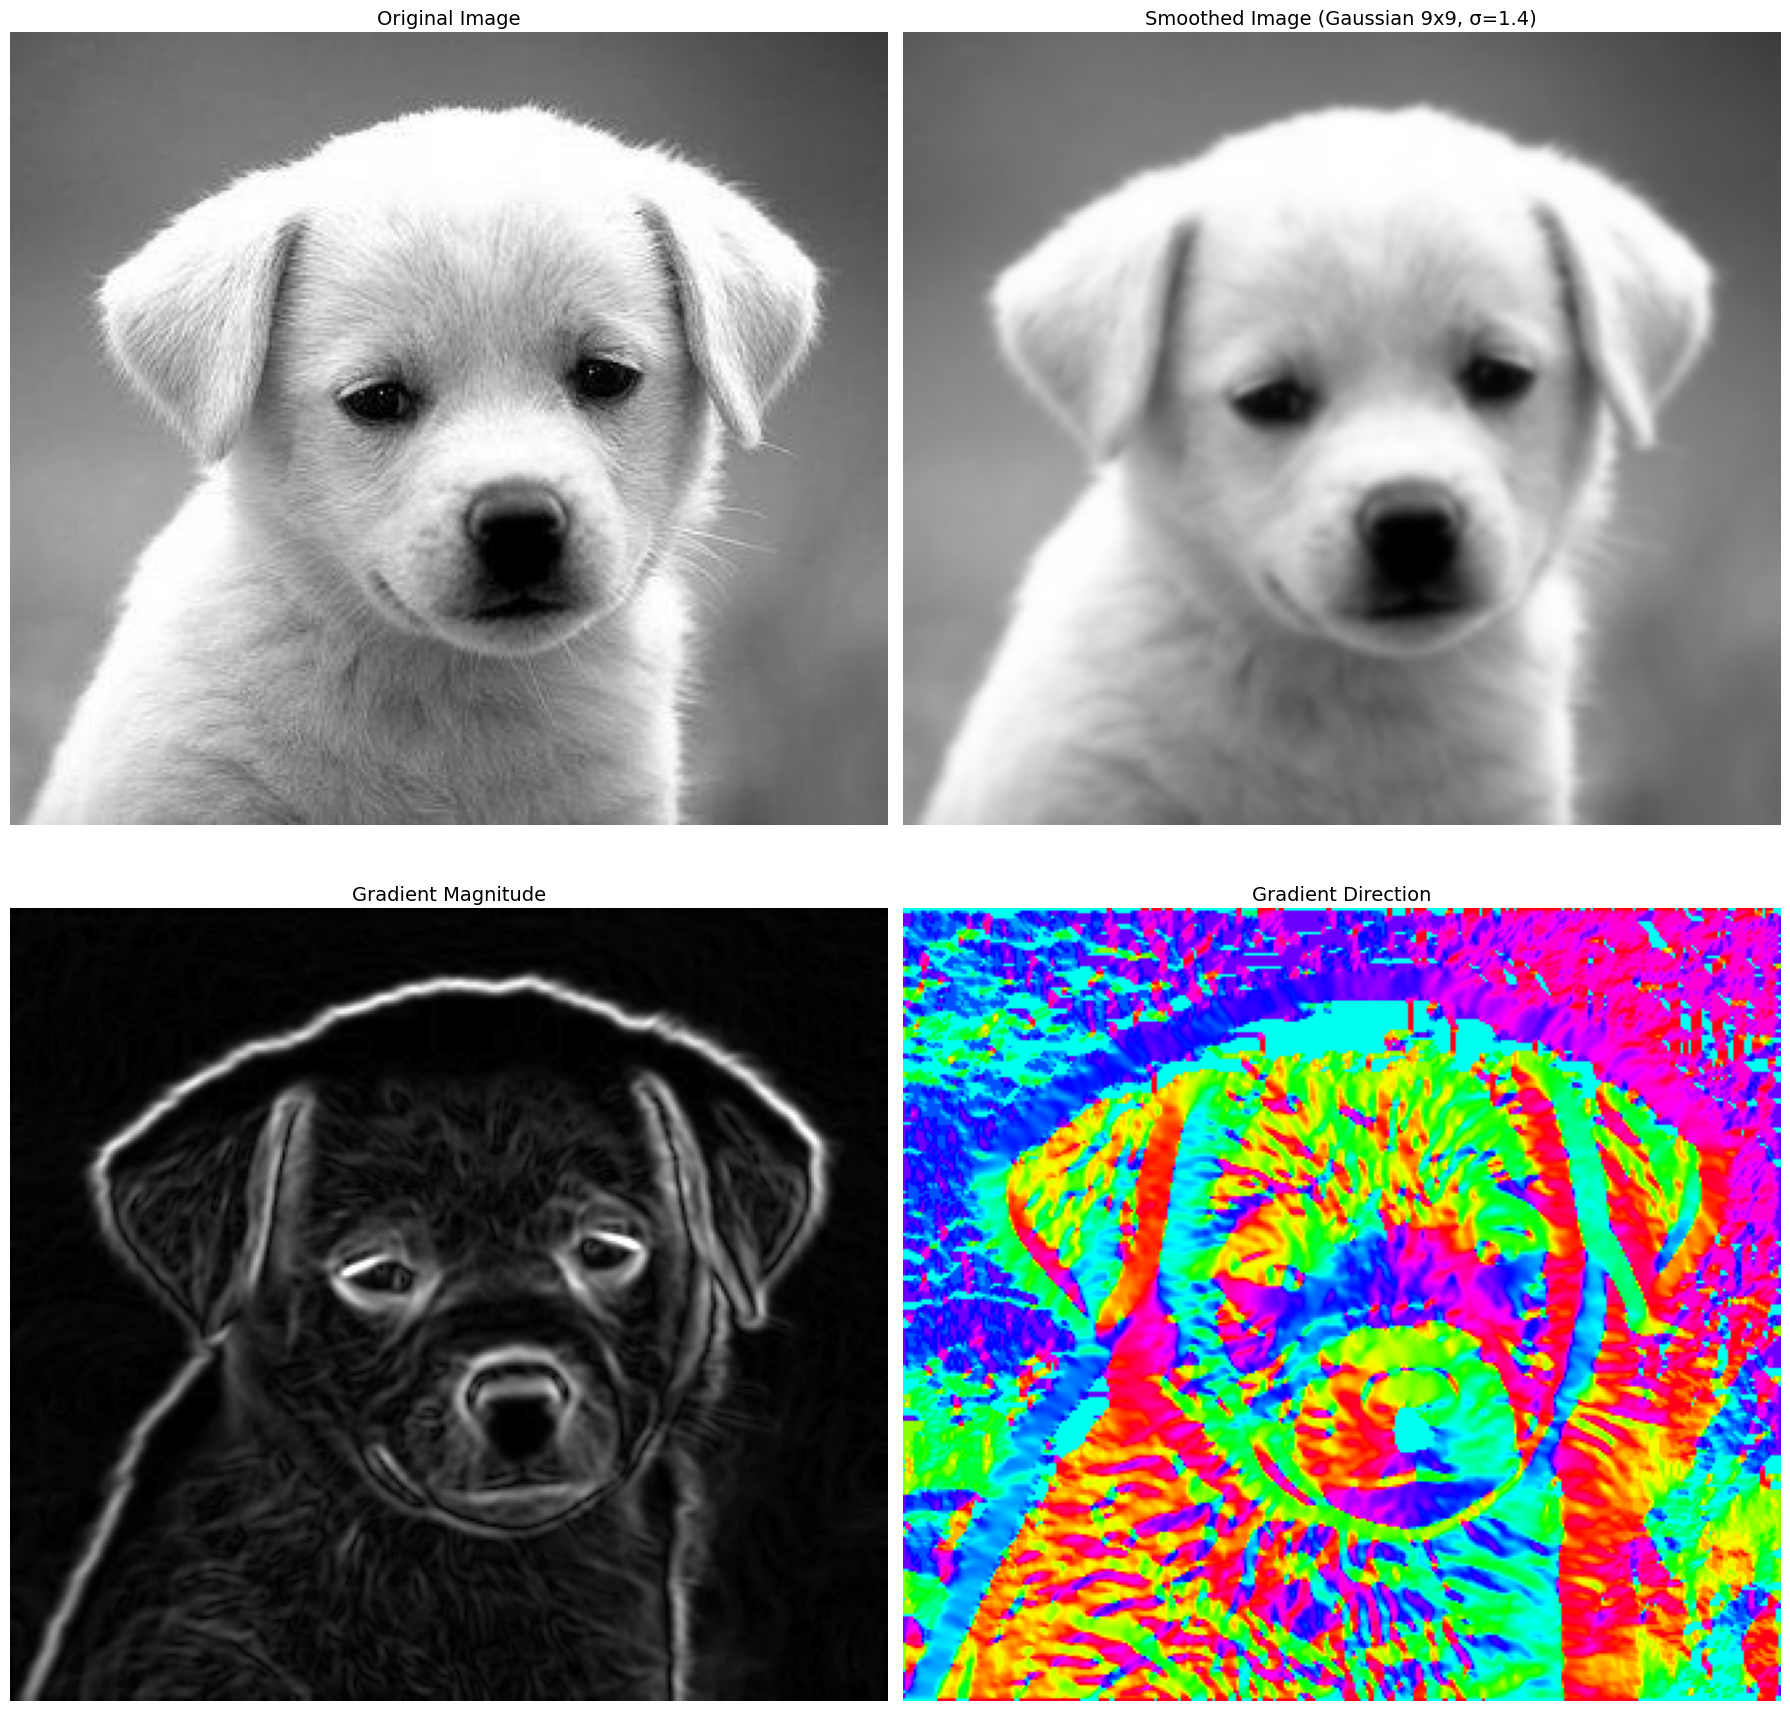

(array([[ 89,  88,  88, ...,  61,  61,  60],
        [ 89,  89,  88, ...,  61,  61,  60],
        [ 90,  89,  89, ...,  61,  61,  61],
        ...,
        [144, 144, 145, ..., 103, 103, 102],
        [144, 144, 147, ..., 103, 103, 102],
        [144, 145, 149, ..., 103, 103, 102]], dtype=uint8),
 array([[ 89,  89,  89, ...,  61,  61,  61],
        [ 89,  89,  89, ...,  61,  61,  61],
        [ 89,  89,  89, ...,  61,  61,  61],
        ...,
        [145, 145, 147, ..., 103, 103, 103],
        [145, 146, 148, ..., 103, 103, 103],
        [145, 146, 149, ..., 103, 103, 103]], dtype=uint8),
 array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 4,  4,  4, ...,  3,  1,  0],
        ...,
        [ 2,  9, 21, ...,  4,  1,  2],
        [ 2, 13, 25, ...,  4,  0,  0],
        [ 0, 14, 26, ...,  4,  0,  0]], dtype=uint8),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , .

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def edge_detection_pipeline(image_path):
    # ---------- Step 1: Load Image ----------
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # grayscale for edges

    # ---------- Step 2: Smoothing with Gaussian filter ----------
    smoothed = cv2.GaussianBlur(img, (9, 9), 1.4)

    # ---------- Step 3: Gradient Computation ----------
    # Compute gradients using Sobel operators
    Gx = cv2.Sobel(smoothed, cv2.CV_64F, 1, 0, ksize=3)  # x-direction
    Gy = cv2.Sobel(smoothed, cv2.CV_64F, 0, 1, ksize=3)  # y-direction

    # Gradient magnitude
    grad_mag = np.sqrt(Gx**2 + Gy**2)
    grad_mag = cv2.convertScaleAbs(grad_mag)  # scale to 8-bit

    # Gradient direction (in radians)
    grad_dir = np.arctan2(Gy, Gx)

    # Normalize direction for display (map angle to 0–255)
    grad_dir_display = cv2.normalize(grad_dir, None, 0, 255, cv2.NORM_MINMAX)
    grad_dir_display = grad_dir_display.astype(np.uint8)

    # ---------- Step 4: Show Results ----------
    plt.figure(figsize=(18,18))

    plt.subplot(2,2,1)
    plt.title("Original Image", fontsize=14)
    plt.imshow(img, cmap='gray')
    plt.axis("off")

    plt.subplot(2,2,2)
    plt.title("Smoothed Image (Gaussian 9x9, σ=1.4)", fontsize=14)
    plt.imshow(smoothed, cmap='gray')
    plt.axis("off")

    plt.subplot(2,2,3)
    plt.title("Gradient Magnitude", fontsize=14)
    plt.imshow(grad_mag, cmap='gray')
    plt.axis("off")

    plt.subplot(2,2,4)
    plt.title("Gradient Direction", fontsize=14)
    plt.imshow(grad_dir_display, cmap='hsv')  # HSV colormap shows angles
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    return img, smoothed, grad_mag, grad_dir

# Example usage
edge_detection_pipeline("/content/dog.jpg")
